# Collecting data activist newsletters with Webscraping

Within this notebook newsletters from the European Digital Rights Initiative (EDRi) were scraped. This process is part of the Thesis: Unravelling resistance in the age of the Data Revolution - A Digital Methods approach towards data activism in Europe. This Thesis explores the emergence and mobilization of data activist practices in Europe. In doing so, it delves into the case study of the EDRi. The thesis argues that data activism creates alternative epistemologies of datafication, whereas the development of data activist practices are subjected to the specific context in which they develop. For this reason, the thesis analyses the evolving practices and narratives of the EDRi as a form of resistance against massive data collection and surveillance practices within Europe.

To explore the narratives of resistance of the EDRi as part of their overall mobilisation, the newsletters on their website were scraped using the Python scraper BeautifulSoup. Within the newsletters the EDRi sets the aganda, explain their tactics and topics of concern. Therefore, these newsletters provide a good source for further analysis. The corpus that is created from this process is further analysed using the web tool Voyant. 

## Gathering the data:

We start by importing the necessary libraries for this project.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from geotext import GeoText
import seaborn as sns
import matplotlib.pyplot as plt

As we are dealing with large amounts of texts, we can widen the rows of the pandas dataframe.

In [33]:
pd.set_option('max_colwidth', 300)

We start by making a request to the newsletter page of the EDRi. On this page all the newsletters from 2020 up till 2023 can be found. At a glance, we can tell that the newsletter page contains a lot of information beyond the newsletters. Each newsletter consist of a title, which is a hyperlink to the actual newsletter, an image and a description. Moreover, when going to a specific newsletter, hyperlinks can be found as well. These redirect the reader to a short article as part of the newsletter. 

The overall structure of these newsletters is thus the title, description and the separate articles with their own description. To keep it simple, we are only going to scrape the title of the newsletter, its description and the text within the newsletter. We ignore all the separate articles one can click on, and consider these and their description as the text itself. 

To make the request, we use the function requests.get(url). Thereafter, we can print the response value to see if we made a connection. It should return 200 (401 is an error). 

In [14]:
# Make a request to the newsletter page of the EDRi
url = 'https://edri.org/take-action/edri-gram/'
response = requests.get(url)

In [15]:
response

<Response [200]>

When we use the .text function, we can see the underlying data of the page.

In [16]:
response.text

'<!doctype html>\n<html lang="en-US">\n<head>\n\t\n\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n\n\t<link rel="profile" href="http://gmpg.org/xfn/11">\n\n\t\t<link rel="icon" href="https://edri.org/wp-content/uploads/2023/01/favicon1-20y-32x32.png" sizes="32x32" />\n\t<link rel="icon" href="https://edri.org/wp-content/uploads/2023/01/favicon1-20y-192x192.png" sizes="192x192" />\n\t<link rel="apple-touch-icon-precomposed" href="https://edri.org/wp-content/uploads/2023/01/favicon1-20y-180x180.png" />\n\t<meta name="msapplication-TileImage" content="https://edri.org/wp-content/uploads/2023/01/favicon1-20y-270x270.png" />\n\t\n\t<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v20.6 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>Stay up to date via the EDRi-gram - European Digital Rights (EDRi)</title>\n

To make a BeautifulSoup document, we call the function BeautifulSoup() with two parameters: the response value where we specify that we want access to the content of the webpage and the kind of parser we want to use, for this purpose this will be the html.parser.

In [17]:
# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, "html.parser")

Now its time to collect the titles of the newsletters and their descriptions. In order to do so, we need to inspect the page to find the html tags that we need. Scraping data with BeautfiullSoup mostly looks at these HTML tags and classes. In order to know what these are, one can inspect the website in their browser or look at the underlying data specified above. Moreover, the also need to specify that we want the text. This can be done with the .get_text function. The .find_all function helps to get access to all the titles and descriptions on the page.

In [18]:
# Find all the newsletter titles and descriptions
newsletter_titles = [h3.get_text(strip=True) for h3 in soup.find_all("h3", class_="news-listing__title")]
newsletter_descs = [p.get_text(strip=True) for p in soup.find_all("p", class_="news-listing__excerpt")]

Now we can check what it looks like. 

In [19]:
newsletter_titles

['EDRi-gram, 3 May 2023',
 'EDRi-gram, 19 April 2023',
 'EDRi-gram, 29 March 2023',
 'EDRi-gram, 15 March 2023',
 'EDRi-gram, 1 March 2023',
 'EDRi-gram, 16 February 2023',
 'EDRi-gram, 1 February 2023',
 'EDRi-gram, 14 December 2022',
 'EDRi-gram, 30 November 2022',
 'EDRi-gram, 16 November 2022',
 'EDRi-gram, 28 September 2022',
 'EDRi-gram, 14 September',
 'EDRi-gram, 6 July 2022',
 'EDRi-gram, 8 June 2022',
 'EDRi-gram, 25 May 2022',
 'EDRi-gram, 4 May 2022',
 'EDRi-gram, 20 April 2022',
 'EDRi-gram, 6 April 2022',
 'EDRi-gram, 23 March 2022',
 'EDRi-gram, 9 March 2022',
 'EDRi-gram, 16 February 2022',
 'EDRi-gram, 2 February 2022',
 'EDRi-gram, 19 January 2022',
 'EDRi-gram, 15 December 2021',
 'EDRi-gram, 1 December 2021',
 'EDRi-gram, 17 November 2021',
 'EDRi-gram, 3 November 2021',
 'EDRi-gram, 20 October 2021',
 'EDRi-gram, 6 October 2021',
 'EDRi-gram, 22 September 2021',
 'EDRi-gram, 8 September 2021',
 'EDRi-gram, 14 July 2021',
 'EDRi-gram, 30 June 2021',
 'EDRi-gram, 16 

In [20]:
newsletter_descs

['This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Media Freedom Act.\r\n\r\nAmong other digital rights updates, read about how Irish and French Parliamentarians have become the latest voices to sound the alarm against monitoring of people’s messages in the proposed Child Sexual Abuse Regulation.\r\n\r\nYou can still share your feedback on the draft programme for an initial decolonising process for the digital rights field in Europe.',
 "In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe.\r\n\r\nMultiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government access to data.\r\n

Now its time to get the actual text within the newsletters. For this we first need all the links to these newsletters. The HTML tag 'a' illustrates a hyperlink. We then need to select this for further use with the .select() function in which the class and tag is specified.

In [22]:
# Find all the newsletter links
newsletter_links = soup.select("a.block--card[href]")

Now we can create a for loop that iterates over all the links. Within the for loop we need to specify that we want to get the content within the newsletter. We want the headers of the subarticles and the text thats underneath them. We create empty lists and store the content within these lists. 

In [23]:
# Loop over the newsletter links and scrape data
newsletter_texts = []
newsletter_headers = []
for link in newsletter_links:
    # Follow the link to the newsletter page
    newsletter_response = requests.get(link["href"])
    newsletter_soup = BeautifulSoup(newsletter_response.content, "html.parser")
    #Look for the HTML tag and class and access the text
    newsletter_header = [h3.get_text(strip=True) for h3 in newsletter_soup.find_all("h3", class_='content-listing__title')]
    newsletter_text = [p.get_text(strip=True) for p in newsletter_soup.find_all("p", class_='content-listing__excerpt')]
    #Store the headers of the articles and the texts in the empty lists
    newsletter_texts.append(newsletter_text)
    newsletter_headers.append(newsletter_header)

In [24]:
newsletter_texts

[['Free Software Foundation Europe is a charity that empowers users to control technology. Software is deeply involved in all aspects of our lives. Free Software gives everybody the...',
  'The Irish parliament’s justice committee and the French Senate have become the latest voices to sound the alarm about the risk of general monitoring of people’s messages in...',
  'The EDRi network published amendments and recommendations for the European Media Freedom Act (EMFA) proposal calling for comprehensive protection for journalists, journalistic sources and human defenders against surveillance...',
  'The use of artificial intelligence (AI) is accelerating. So is the need to ensure that AI systems are not only effective, but also fair, non-discriminatory, transparent, rights-based, accountable,...',
  'The use of artificial intelligence (AI) has a major influence on climate action, climate change mitigation and the work of environmental defenders. It offers potential benefits, for example..

In [25]:
newsletter_headers

[['Member in the Spotlight: Free Software Foundation Europe',
  'Irish and French parliamentarians sound the alarm about EU’s CSA Regulation',
  'Spyware is only the tip of the iceberg: we need to protect journalists from all forms of surveillance',
  'Moving from empty buzzwords to real empowerment: a framework for enabling meaningful engagement of external stakeholders in AI',
  'Where artificial intelligence and climate action meet',
  'EU plan for international border data-sharing system “should not proceed”',
  'New Romanian cybersecurity law in force despite heavy criticism',
  'As AI Act vote nears, the EU needs to draw a red line on racist surveillance',
  'Civil society urges European Parliament to protect people’s rights in the AI Act',
  'Decolonising the digital rights field in Europe: Call for feedback on our first draft programme',
  'More-than-human exhibition (Curated by Jane Tingley)',
  'Psychosocial Circles Now Open!',
  'Online workshop on digital rights and electio

After checking if we got the right data, we can create a pandas dataframe with the columns: title, description, text and headers. 

In [41]:
# Combine the data into a Pandas DataFrame
df = pd.DataFrame({
    "Title": newsletter_titles,
    "Description": newsletter_descs,
    "Text": newsletter_texts,
    "Headers": newsletter_headers})

By looking at the dataframe, we can see that we gathered 65 newsletters.

In [42]:
df

,Title,Description,Text,Headers
0,"EDRi-gram, 3 May 2023","This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med...","[Free Software Foundation Europe is a charity that empowers users to control technology. Software is deeply involved in all aspects of our lives. Free Software gives everybody the..., The Irish parliament’s justice committee and the French Senate have become the latest voices to sound the alarm ...","[Member in the Spotlight: Free Software Foundation Europe, Irish and French parliamentarians sound the alarm about EU’s CSA Regulation, Spyware is only the tip of the iceberg: we need to protect journalists from all forms of surveillance, Moving from empty buzzwords to real empowerment: a framew..."
1,"EDRi-gram, 19 April 2023","In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe.\r\n\r\nMultiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government a...","[On 21 March, we celebrated EDRi 20th anniversary in Brussels, the heart of the European Union. Close friends and supporters gathered at Bozar, the Center for Fine Arts,..., Meredith Whittaker, the President of the Signal Foundation, delivered the closing keynote speech at EDRi’s 20th-anniversar...","[A collective project: EDRi celebrates turning 20 in the capital of the EU, Signal’s Meredith Whittaker voices EDRi’s concerns with the CSA Regulation, Health and digital rights organisations urge EU lawmakers to uphold patients’ rights in new health data law, EU-US plan offensive to legitimise ..."
2,"EDRi-gram, 29 March 2023","Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r...","[The newly-launched Protect My Face campaign gives residents of the Brussels region of Belgium the opportunity to oppose mass facial recognition. EDRi applauds this initiative which demands that..., The European Center for Not-for-Profit Law is concerned about safeguarding human rights and limit...","[Protect My Face: Brussels residents join the fight against biometric mass surveillance, Mapping the impact of biometric surveillance and social media platforms on civic space, Manchester 10: Open letter asks Andy Burnham to tackle discriminatory ‘gang’ surveillance, “Social media profiles and p..."
3,"EDRi-gram, 15 March 2023","Last week, on International Women’s Day, EDRi’s Sarah Chander and Claire Fernandez were honoured as leading voices for change in the European Union and tech and digital rights space.\r\n\r\nJoin us in celebrating them and all women!\r\n\r\nIn this edition, amongst other digital rights updates, c...","[In January 2023, EDRi gathered policymakers, activists, human rights defenders, climate and social justice advocates and academics in Brussels to discuss the criticality of our digital worlds. We..., The foundations for a Europe-wide digital identity system are just about to be laid. Will Europ...","[#PrivacyCamp23: Event summary, European digital identity – a potential game changer?, Who does the EU legislator listen to, if it isn’t the experts?, Case challenging Meta’s arbitrary removal of Polish NGO’s accounts finally in court, Iran: Digital spaces of protest and control, Open Letter: Th..."
4,"EDRi-gram, 1 March 2023","In this edition of the EDRi-gram, we celebrate the success of EDRi’s member in the Czech Republic against the use of Google analytics in state services.\r\n\r\nWe are also exploring the consequences of 

### Cleaning the data: 

Now that the corpus is created, it is time to clean the data. When scraping the newsletters, I noticed that there was one newsletter without a year in the title. We can add this ourselves with the .str.replace() function.

In [44]:
df['Title'] = df['Title'].str.replace("EDRi-gram, 14 September", "EDRi-gram, 14 September 2022")

After doing so, we can create a new collumn with the actual dates. In doing so we need to split the titles and extract the dates. After this we can convert this to 'datetime.' 

In [45]:
df["Date"] = df["Title"].apply(lambda title: " ".join(title.split()[-3:]))

In [46]:
# convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d %B %Y")

In [47]:
df

,Title,Description,Text,Headers,Date
0,"EDRi-gram, 3 May 2023","This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med...","[Free Software Foundation Europe is a charity that empowers users to control technology. Software is deeply involved in all aspects of our lives. Free Software gives everybody the..., The Irish parliament’s justice committee and the French Senate have become the latest voices to sound the alarm ...","[Member in the Spotlight: Free Software Foundation Europe, Irish and French parliamentarians sound the alarm about EU’s CSA Regulation, Spyware is only the tip of the iceberg: we need to protect journalists from all forms of surveillance, Moving from empty buzzwords to real empowerment: a framew...",2023-05-03
1,"EDRi-gram, 19 April 2023","In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe.\r\n\r\nMultiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government a...","[On 21 March, we celebrated EDRi 20th anniversary in Brussels, the heart of the European Union. Close friends and supporters gathered at Bozar, the Center for Fine Arts,..., Meredith Whittaker, the President of the Signal Foundation, delivered the closing keynote speech at EDRi’s 20th-anniversar...","[A collective project: EDRi celebrates turning 20 in the capital of the EU, Signal’s Meredith Whittaker voices EDRi’s concerns with the CSA Regulation, Health and digital rights organisations urge EU lawmakers to uphold patients’ rights in new health data law, EU-US plan offensive to legitimise ...",2023-04-19
2,"EDRi-gram, 29 March 2023","Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r...","[The newly-launched Protect My Face campaign gives residents of the Brussels region of Belgium the opportunity to oppose mass facial recognition. EDRi applauds this initiative which demands that..., The European Center for Not-for-Profit Law is concerned about safeguarding human rights and limit...","[Protect My Face: Brussels residents join the fight against biometric mass surveillance, Mapping the impact of biometric surveillance and social media platforms on civic space, Manchester 10: Open letter asks Andy Burnham to tackle discriminatory ‘gang’ surveillance, “Social media profiles and p...",2023-03-29
3,"EDRi-gram, 15 March 2023","Last week, on International Women’s Day, EDRi’s Sarah Chander and Claire Fernandez were honoured as leading voices for change in the European Union and tech and digital rights space.\r\n\r\nJoin us in celebrating them and all women!\r\n\r\nIn this edition, amongst other digital rights updates, c...","[In January 2023, EDRi gathered policymakers, activists, human rights defenders, climate and social justice advocates and academics in Brussels to discuss the criticality of our digital worlds. We..., The foundations for a Europe-wide digital identity system are just about to be laid. Will Europ...","[#PrivacyCamp23: Event summary, European digital identity – a potential game changer?, Who does the EU legislator listen to, if it isn’t the experts?, Case challenging Meta’s arbitrary removal of Polish NGO’s accounts finally in court, Iran: Digital spaces of protest and control, Open Letter: Th...",2023-03-15
4,"EDRi-gram, 1 March 2023","In this edition of the EDRi-gram, we celebrate the success of EDRi’s member in the Czech Republic against the use of Google analytics in state services.\

The Text and Header columns of the newsletters where all stored as a list. However, to make all the columns the same data type, we can convert these to strings. Thereafter, we can combine all columns. This will create a column with all the text that has been extracted from the various layers of the newsletter page, which makes the further exploration of trends and patterns of this corpus much easier. 

In [48]:
# convert list column to string
df['Text'] = df['Text'].apply(lambda x: ', '.join(x))


In [49]:
df['Headers'] = df['Headers'].apply(lambda x: ', '.join(x))

In [52]:
df["Full body"] = df["Description"] + df["Headers"]+ df["Text"]

For further cleaning, we also want to get rid of any newline characters. This can be done with the str.replace function. The .str.strip() function removes all the whitespace at the beginning and end of a string.

In [65]:
df["Text"] = df["Text"].str.replace("\r\n", " ").str.strip()

In [66]:
df["Headers"] = df["Headers"].str.replace("\r\n", " ").str.strip()

In [67]:
df["Description"] = df["Description"].str.replace("\r\n", " ").str.strip()

In [71]:
df['Full body'] = df['Full body'].str.replace("\r\n", " ").str.strip()

In [72]:
df

,Title,Description,Text,Headers,Date,Full body
0,"EDRi-gram, 3 May 2023","This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med...","Free Software Foundation Europe is a charity that empowers users to control technology. Software is deeply involved in all aspects of our lives. Free Software gives everybody the..., The Irish parliament’s justice committee and the French Senate have become the latest voices to sound the alarm a...","Member in the Spotlight: Free Software Foundation Europe, Irish and French parliamentarians sound the alarm about EU’s CSA Regulation, Spyware is only the tip of the iceberg: we need to protect journalists from all forms of surveillance, Moving from empty buzzwords to real empowerment: a framewo...",2023-05-03,"This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med..."
1,"EDRi-gram, 19 April 2023","In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe. Multiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government access ...","On 21 March, we celebrated EDRi 20th anniversary in Brussels, the heart of the European Union. Close friends and supporters gathered at Bozar, the Center for Fine Arts,..., Meredith Whittaker, the President of the Signal Foundation, delivered the closing keynote speech at EDRi’s 20th-anniversary...","A collective project: EDRi celebrates turning 20 in the capital of the EU, Signal’s Meredith Whittaker voices EDRi’s concerns with the CSA Regulation, Health and digital rights organisations urge EU lawmakers to uphold patients’ rights in new health data law, EU-US plan offensive to legitimise p...",2023-04-19,"In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe. Multiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government access ..."
2,"EDRi-gram, 29 March 2023","Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r...","The newly-launched Protect My Face campaign gives residents of the Brussels region of Belgium the opportunity to oppose mass facial recognition. EDRi applauds this initiative which demands that..., The European Center for Not-for-Profit Law is concerned about safeguarding human rights and limiti...","Protect My Face: Brussels residents join the fight against biometric mass surveillance, Mapping the impact of biometric surveillance and social media platforms on civic space, Manchester 10: Open letter asks Andy Burnham to tackle discriminatory ‘gang’ surveillance, “Social media profiles and ph...",2023-03-29,"Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r..."
3,"EDRi-gram, 15 March 2023","Last week, on International Women’s Day, EDRi’s Sarah Chander and Claire Fernandez were honoured as leading voices for change in the European Union and tech and digital rights space. J

### Adding mentioned locations:

To explore the corpus a bit further, we can look at the mentioned locations within the newsletters. By doing so, we can see with which locations the EDRi is concerned. It can tell us something about the violation of our digital rights within these locations or sucesses the EDRi made within these locations. 

In order to do so, we need to install the package 'geotext.' This library detects various locations within a text like cities or countries. The limitation of the package is that it does overlook the mentions of nationalities like 'French' or 'Dutch. Moreover, sometimes it sees words that are frequently used as places too.' Still, it can help to give insight into the issues the EDRi is concerned with and illustrates the locations of interest within their discourse.

In [ ]:
!pip install geotext

We can create a function in which we specify that we want the cities and countries from the newsletters. It returns the places seperated by a comma as a new column in the dataframe.

In [76]:
def extract_locations(text):
    places = GeoText(text).cities + GeoText(text).countries
    return ", ".join(set(places))
df["Locations of interest"] = df["Full body"].apply(extract_locations)

In [77]:
df

,Title,Description,Text,Headers,Date,Full body,Locations of interest
0,"EDRi-gram, 3 May 2023","This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med...","Free Software Foundation Europe is a charity that empowers users to control technology. Software is deeply involved in all aspects of our lives. Free Software gives everybody the..., The Irish parliament’s justice committee and the French Senate have become the latest voices to sound the alarm a...","Member in the Spotlight: Free Software Foundation Europe, Irish and French parliamentarians sound the alarm about EU’s CSA Regulation, Spyware is only the tip of the iceberg: we need to protect journalists from all forms of surveillance, Moving from empty buzzwords to real empowerment: a framewo...",2023-05-03,"This week, as the EU Parliament gets ready to vote on the AI Act, we are urging members of Parliament to protect people’s rights in this landmark legislation. We are putting forward our recommendations to lawmakers on protecting journalists from all kinds of surveillance through the European Med...","Berlin, Costa Rica, Feira, Spring, Turkey"
1,"EDRi-gram, 19 April 2023","In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe. Multiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government access ...","On 21 March, we celebrated EDRi 20th anniversary in Brussels, the heart of the European Union. Close friends and supporters gathered at Bozar, the Center for Fine Arts,..., Meredith Whittaker, the President of the Signal Foundation, delivered the closing keynote speech at EDRi’s 20th-anniversary...","A collective project: EDRi celebrates turning 20 in the capital of the EU, Signal’s Meredith Whittaker voices EDRi’s concerns with the CSA Regulation, Health and digital rights organisations urge EU lawmakers to uphold patients’ rights in new health data law, EU-US plan offensive to legitimise p...",2023-04-19,"In this edition of the EDRi-gram, we are inviting you to share your feedback on a draft programme for an initial decolonising process for the digital rights field in Europe. Multiple voices are raised against the EU CSAR proposal amidst plans revealing the wish to systematise government access ...","Union, Czech Republic, France, March, Berlin, Police, Copenhagen, Brussels, Oslo, Feira, Spring, Stockholm"
2,"EDRi-gram, 29 March 2023","Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r...","The newly-launched Protect My Face campaign gives residents of the Brussels region of Belgium the opportunity to oppose mass facial recognition. EDRi applauds this initiative which demands that..., The European Center for Not-for-Profit Law is concerned about safeguarding human rights and limiti...","Protect My Face: Brussels residents join the fight against biometric mass surveillance, Mapping the impact of biometric surveillance and social media platforms on civic space, Manchester 10: Open letter asks Andy Burnham to tackle discriminatory ‘gang’ surveillance, “Social media profiles and ph...",2023-03-29,"Last week, with a close circle of friends and supporters in Brussels, EDRi celebrated twenty years of defending and advancing digital rights across Europe. It was an evening full of reflecting on our journey and successes and also building hope and strategies for the future of Europe’s digital r...","Netherlands, Shaping, Manchester, Belg

Before exploring the dataset, it is import to save the dataframe as a CSV file. Especially when using Jupiter Notebook. Otherwise all the code has to be run again when opening the notebook at a later time and this can be time consuming. 

In [83]:
df.to_csv('EDRi newsletters dataset.csv', index= True)

## Exploring the Dataset:

In order to explore the dataset, we need to upload it again and store it in a pandas dataframe.

In [2]:
newsletter_df = pd.read_csv('EDRi newsletters dataset 2020-2023.csv', index_col=0)  

We also need to convert the date column to 'datetime' again.

In [4]:
newsletter_df['Date'] = pd.to_datetime(newsletter_df['Date'])

In [3]:
newsletter_df

,Title,Description,Text,Headers,Date,Full body,Locations of interest
0,"EDRi-gram, 3 May 2023","This week, as the EU Parliament gets ready to ...",Free Software Foundation Europe is a charity t...,Member in the Spotlight: Free Software Foundat...,2023-05-03,"This week, as the EU Parliament gets ready to ...","Berlin, Costa Rica, Feira, Turkey"
1,"EDRi-gram, 19 April 2023","In this edition of the EDRi-gram, we are invit...","On 21 March, we celebrated EDRi 20th anniversa...",A collective project: EDRi celebrates turning ...,2023-04-19,"In this edition of the EDRi-gram, we are invit...","Czech Republic, France, Berlin, Copenhagen, B..."
2,"EDRi-gram, 29 March 2023","Last week, with a close circle of friends and ...",The newly-launched Protect My Face campaign gi...,Protect My Face: Brussels residents join the f...,2023-03-29,"Last week, with a close circle of friends and ...","Netherlands, Manchester, Belgium,Utrecht, Berl..."
3,"EDRi-gram, 15 March 2023","Last week, on International Women’s Day, EDRi’...","In January 2023, EDRi gathered policymakers, a...","#PrivacyCamp23: Event summary, European digita...",2023-03-15,"Last week, on International Women’s Day, EDRi’...","Italy, Greece, France, Ireland, Hungary, Cope..."
4,"EDRi-gram, 1 March 2023","In this edition of the EDRi-gram, we celebrate...",The Czech organisation Iuridicum Remedium (IuR...,Czech online state services without Google Ana...,2023-03-01,"In this edition of the EDRi-gram, we celebrate...","Netherlands, Greece, Czech Republic, Berlin, B..."
...,...,...,...,...,...,...,...
60,"EDRi-gram 18.5, 11 March 2020","""As law enforcement across Europe increasingly...",As facial recognition technologies are gradual...,Stuck under a cloud of suspicion: Profiling in...,2020-03-11,"""As law enforcement across Europe increasingly...","Greece, Germany, Brussels, Turkey"
61,"EDRi-gram 18.4, 26 February 2020","""The requirement of a notification seems to be...","From a fundamental rights perspective, it’s es...",Click here to allow notifications in cross-bor...,2020-02-26,"""The requirement of a notification seems to be...",Romania
62,"EDRi-gram 18.3, 12 February 2020","""We have to ask ourselves what kind of a world...",This is the first blogpost of a series on our ...,The human rights impacts of migration control ...,2020-02-12,"""We have to ask ourselves what kind of a world...","Vietnam, Germany, Mobile"
63,"EDRi-gram 18.2, 29 January 2020","""We've all heard the saying: 'If the product i...",In this fourth installment of EDRi’s facial re...,"Stalked by your digital doppelganger?, CJEU to...",2020-01-29,"""We've all heard the saying: 'If the product i...",Germany


To get a sense of the newsletters, we can create a new collumn within the dataframe which stores the word length of each newsletter. In this way we can get some idea of the length of the documents we are dealing with. In doing so, we use the len() function to get the length of the documents. In here we specify the .split() function, which splits all the sentences of the documents into separate words. 

In [11]:
newsletter_df['word_length'] = newsletter_df['Full body'].apply(lambda x: len(x.split()))

Now we can get some idea of the structure of these newsletters. We can use the pandas .describe() function to get a general overview of the word length of the newsletters.

In [12]:
newsletter_df['word_length'].describe()

count      65.000000
mean      824.338462
std       493.914791
min       121.000000
25%       400.000000
50%       676.000000
75%      1261.000000
max      1819.000000
Name: word_length, dtype: float64

In doing so we can see that the avarage word length of the newsletter is 824 words. The minimum amount of words is 121 and the maximum is 1819. This illustrates that there is a wide range of the length of the newsletters. Some are really short and others are longer. To explore this further, we can make a histogram of the word length of the newsletters. 

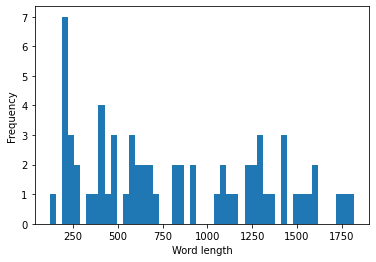

In [84]:
plt.hist(newsletter_df['word_length'], bins=50)
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates that most newsletters are relatively short, going over the discussed topics briefly. Only a few contain a higher amount of words, indicating that these newsletters introduce the topics more indepth. 

We can also distribute the newsletters and their length in a scatterplot. This helps to see if the varied number of words across the newsletters is related to the time they were published. 

<AxesSubplot:xlabel='word_length', ylabel='Date'>

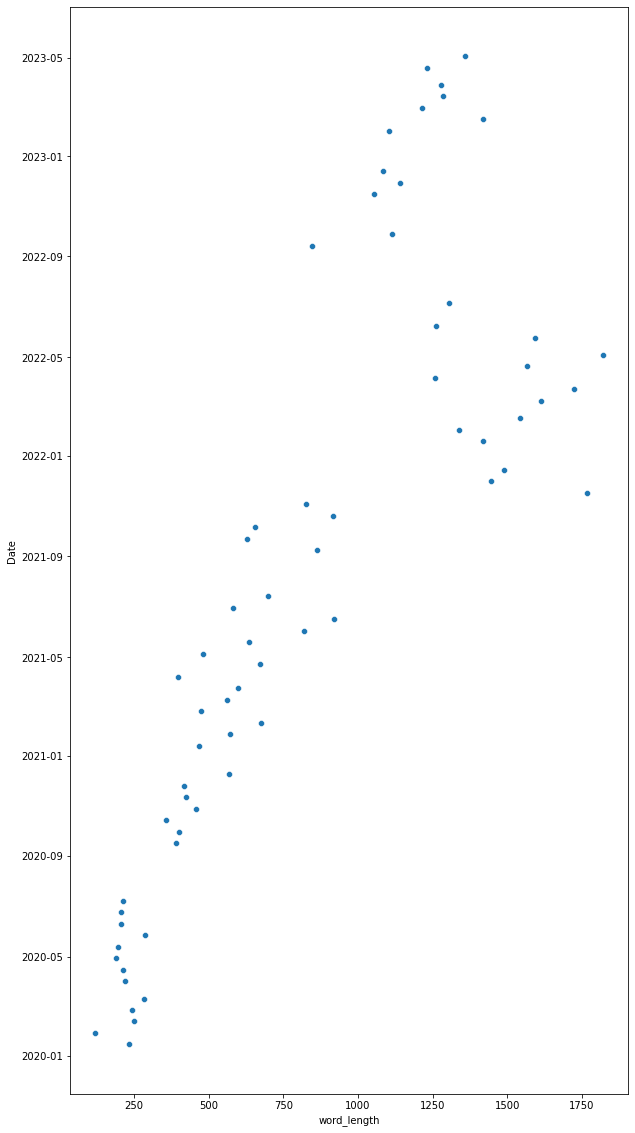

In [16]:
fig, ax = plt.subplots(figsize=(10, 20))

sns.scatterplot(data=newsletter_df, x='word_length', y='Date')

Within the plot, we can see that all the newsletters with a low word count are all published in 2020. The ones with a higher word count are published very recently. This might indicate that the EDRi puts more effort in their newsletters, that there are more topics they want to address or that simply another person writes them. Still, the graphs gives a good overview of how the structure of the newsletters changes over time. 

### What are EDRi's locations of interest?

As a further step of this brief exploratory data analysis, we can see the frequency of the mentioned locations within the newsletters. In order to do so, we can import the Counter function. This counts how many times a specific word is mentioned. We can store this in a new dataframe to create a visualization of the frequencty of location mentions. 

Firstly, we create an empty list in which we can store the locations. Within the current dataframe, the 'locations of interest' contains string in which the locations are mentioned and separated by comma for every newsletter. However, we want to get all the locations seperatly so we can see how many times a specific location in mentioned across all the newsletters. 

Therefore, we create for-loop which goes over the column. Within the for-loop we check if the row contains a string or a NaN value. If it is a string, the locations are seperated and stored in the list. 

In [31]:
from collections import Counter

locations = []
for location in newsletter_df['Locations of interest']:
    if isinstance(location, str):
        for location in location.split(','):
            locations.append(location.strip())
locations

['Berlin',
 'Costa Rica',
 'Feira',
 'Turkey',
 'Czech Republic',
 'France',
 'Berlin',
 'Copenhagen',
 'Brussels',
 'Oslo',
 'Feira Stockholm',
 'Netherlands',
 'Manchester',
 'Belgium',
 'Utrecht',
 'Berlin',
 'Copenhagen',
 'Brussels',
 'Oslo',
 'Feira',
 'Stockholm',
 'Italy',
 'Greece',
 'France',
 'Ireland',
 'Hungary',
 'Copenhagen',
 'Berlin',
 'Brussels',
 'Iran',
 'Oslo',
 'Stockholm',
 'Netherlands',
 'Greece',
 'Czech Republic',
 'Berlin',
 'Brussels',
 'Spring',
 'Poland',
 'Turkey',
 'Greece',
 'Serbia',
 'Berlin',
 'Brussels',
 'Greece',
 'United Kingdom',
 'Berlin',
 'Brussels',
 'Berlin',
 'Costa Rica',
 'Brussels',
 'Romania',
 'Thailand',
 'Germany',
 'Berlin',
 'Costa Rica',
 'Brussels',
 'Sweden',
 'Poland',
 'Austria',
 'Helsinki',
 'Czech Republic',
 'Ukraine',
 'Brazil',
 'Sri Lanka',
 'Germany',
 'Brussels',
 'Belgium',
 'Norway',
 'Ukraine',
 'Brussels',
 'Marseille',
 'Geneva',
 'Germany',
 'Berlin',
 'London',
 'Brussels',
 'San Francisco',
 'Belgium',
 'Net

Now we can use the Counter() function. In here we specify that we want it to count all the locations within the list. We can print the locations and their frequency.

In [33]:
# Create a Counter object for the locations list
locations_counter = Counter(locations)

# Print the most common locations
print(locations_counter.most_common())

[('Brussels', 31), ('Berlin', 26), ('Belgium', 16), ('London', 15), ('Germany', 14), ('France', 11), ('Greece', 9), ('Delft', 7), ('Netherlands', 6), ('Austria', 6), ('Czech Republic', 5), ('Italy', 5), ('Poland', 5), ('Luxembourg', 5), ('Munich', 5), ('Turkey', 4), ('Romania', 4), ('Ukraine', 4), ('San Francisco', 4), ('Switzerland', 4), ('Costa Rica', 3), ('Copenhagen', 3), ('Oslo', 3), ('Ireland', 3), ('Hungary', 3), ('Serbia', 3), ('Norway', 3), ('Portugal', 3), ('March', 3), ('Rochester', 3), ('Spain', 3), ('Feira', 2), ('Stockholm', 2), ('United Kingdom', 2), ('Sweden', 2), ('Geneva', 2), ('University', 2), ('Bristol', 2), ('Slovenia', 2), ('Feira Stockholm', 1), ('Manchester', 1), ('Utrecht', 1), ('Iran', 1), ('Spring', 1), ('Thailand', 1), ('Helsinki', 1), ('Brazil', 1), ('Sri Lanka', 1), ('Marseille', 1), ('Hollywood', 1), ('Sudan', 1), ('Toronto', 1), ('Canada', 1), ('Sheffield', 1), ('Wiesbaden', 1), ('Switzerland Prague', 1), ('Sebastian', 1), ('Afghanistan', 1), ('Prague',

In doing so, we can see that Brussel is mentioned the most frequently. 

Now its time to store the locations and their frequency in a new dataframe. We can sort the dataframe by descending order so that we can see the location with the highest frequency at the top of the dataframe. 

In [34]:
# Create a dataframe from the Counter object
df_locations = pd.DataFrame.from_dict(locations_counter, orient='index', columns=['frequency'])
df_locations.index.name = 'location'
df_locations = df_locations.reset_index()

# Sort the dataframe by frequency in descending order
df_locations = df_locations.sort_values(by=['frequency'], ascending=False)

# Print the dataframe
print(df_locations)

              location  frequency
7             Brussels         31
0               Berlin         26
12             Belgium         16
36              London         15
26             Germany         14
..                 ...        ...
48           Sheffield          1
49           Wiesbaden          1
50  Switzerland Prague          1
51           Sebastian          1
76              Mobile          1

[77 rows x 2 columns]


Now we can create a bar chart that shows the frequency of the top 40 countries within the dataframe. As some places are only mentioned once, these are not very interesting the explore as we want to know where EDRi's attention within the newsletters goes to. 

The code here shows the creation of the visualization. We specify the data, the size of the image, the color of the bars and the labels within the graph.

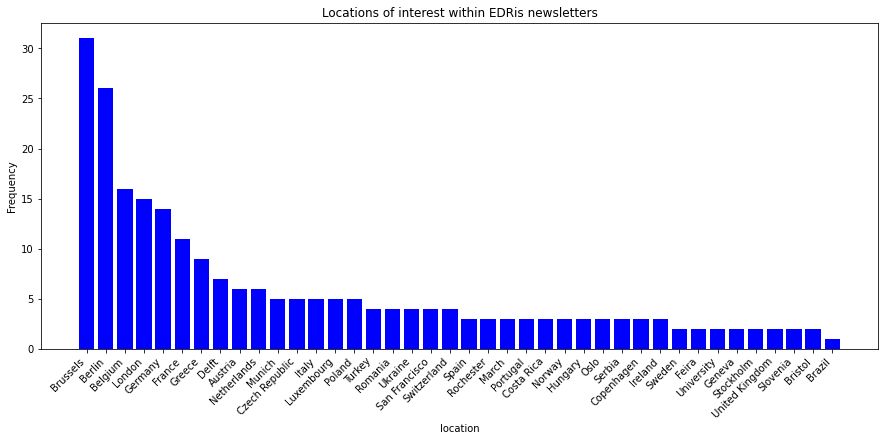

In [49]:
top_countries = df_locations.sort_values(by='frequency', ascending=False).head(40)

# Create the bar chart
plt.figure(figsize=(15,6))
plt.bar(x=top_countries['location'], height=top_countries['frequency'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('location')
plt.ylabel('Frequency')
plt.title('Locations of interest within EDRis newsletters')
plt.show()

The visualization gives a brief overview of the mentioned countries. We see that the European cities Brussel and Berlin are mentioned most frequently. Moreover, we also see some locations that are not in Europe. This indicates that the EDRi, at least in its newsletters, does broaden its scope. Still, the emphasis of the newsletters lies on European places. 